# Data Analysis Using Twitter API

For the purpose of working with the Twitter API, I'll be using the "tweepy" library in Python (http://www.tweepy.org/).

I have added comments throughout the code (wherever required) so as to make it easier to understand. I'll be using "pandas" library in Python (http://pandas.pydata.org/) to convert the returned JSON format into a DataFrame to work on it and analyze it.

## Step 1: Getting Twitter API keys
In order to access Twitter  API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret. Follow the steps below to get all 4 elements:

*   Create a twitter account if you do not already have one.
*   Go to https://apps.twitter.com/ and log in with your twitter credentials.
*   Click "Create New App"
*   Fill out the form, agree to the terms, and click "Create your Twitter application"
*   In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
*   Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret".


In [77]:
#Import the required libraries
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.mpl_style', 'default')


C:\Users\Ajink\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Step 2: Connecting to Twitter Streaming API
Twitter requires all requests to use OAuth for authentication.
We will assign the keys to respective variables for use, and also connect to the Twitter API using these along-with "tweepy". 

In [78]:
consumer_key =  '4zA3XYyuh9YWieIeOuYw3Cdcv'
consumer_secret = 'lHipxuhE9pvFGP0nPjwhYmtVr0qnlt9czHWYKjAN1dX5MGXcsL'
access_token = '727286234196779010-A2Sc6miwWxyANdCCjzADoGMDFIj8jV0'
access_token_secret = 'E6aQQPMZNfw8dVBfbkI0pdqiP4MB28jHTdLLnB9tpQTpS'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


## Step 3: Download the data about Cricket
We can get a good amount of data to use it for the purpose of analysis.For this I'll download first 1000 tweet based on  search query(trend_N)
* Note : it may take a while

In [79]:
data = []
for tweet in tweepy.Cursor(api.search, q='%23Cricket').items(1000): #get first 1000 tweets based on search query(#Cricket)
    data.append(tweet)   

In [80]:
# Verify the number of items returned
print (len(data))
data[0] #the first tweet

1000


Status(retweeted=False, is_quote_status=False, in_reply_to_user_id_str=None, id=727335384972169216, geo=None, id_str='727335384972169216', coordinates=None, metadata={'iso_language_code': 'en', 'result_type': 'recent'}, in_reply_to_user_id=None, favorited=False, in_reply_to_screen_name=None, _json={'retweeted': False, 'is_quote_status': False, 'in_reply_to_user_id_str': None, 'id': 727335384972169216, 'geo': None, 'text': 'NSC not behind CAN  suspension: Bista https://t.co/vbJaGKkCzX #Cricket', 'coordinates': None, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'in_reply_to_user_id': None, 'favorited': False, 'in_reply_to_screen_name': None, 'place': None, 'contributors': None, 'favorite_count': 0, 'source': '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>', 'retweet_count': 0, 'in_reply_to_status_id_str': None, 'id_str': '727335384972169216', 'lang': 'en', 'in_reply_to_status_id': None, 'created_at': 'Tue May 03 03:14:03 +0000 2016', 'possibly_sensitive': False,

## Step 4: Manipulate the data
Now I have my data, but as it is in JSON format it will be somewhat hard to utilize for data analysis. We have to separate out only the data which is required for the analysis. 
To do so, we'll use the pandas library of Python

In [81]:
def toDataFrame(tweets):
# Create a function to convert a given list of tweets into a Pandas DataFrame.

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    DataSet['userLanguage'] = [tweet.user.lang for tweet in tweets]
   
    return DataSet

In [82]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(data)

#Visualize 
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,userLanguage
0,727335384972169216,NSC not behind CAN suspension: Bista https://...,0,0,IFTTT,2016-05-03 03:14:03,464734828,CricSoccer,CricSoccer News,2012-01-15 15:31:02,Latest Cricket and Football News from Nepal. L...,947,91,Nepal,Kathmandu,en
1,727335345206005760,Today.!\n&gt;\n31th_Match\nIn IPL_2016\nDD_vs_...,0,0,Cloudhopper,2016-05-03 03:13:54,1479160699,PTVLiveTv,PTV Sports,2013-06-03 07:58:51,Twitter Ac of PTV Sports Broadcast #Hockey\n#A...,9320,52,"Karachi , Pakistan",None,en
2,727335151714336769,RT @RockyMack1: @bhogleharsha A #cricket tourn...,1,0,The Gujarat Lions FC,2016-05-03 03:13:08,701394200500244480,dGujaratLionsFC,The Gujarat Lions FC,2016-02-21 13:13:03,Official Twitter Fan Club of the IPL franchise...,1563,10,"Rajkot, India",None,en
3,727335063667531776,RT @ICCLive832: GST bill issue explained throu...,0,0,IFTTT,2016-05-03 03:12:47,4361044462,ICCLive832,ICC Live Scores,2015-12-03 11:56:06,#Cricket,324,14,,None,en
4,727335062505705472,#cricket Framed Signed Andrew Strauss Mini Cri...,0,0,IFTTT,2016-05-03 03:12:46,4361044462,ICCLive832,ICC Live Scores,2015-12-03 11:56:06,#Cricket,324,14,,None,en


In [83]:
DataSet = pd.read_csv('out3.csv',encoding='utf8', engine='python')#save the data to be used later as it change every time u call tweepy.cursor!

## Step 5: Clean and Visualize the data 
This step is required so that we only use valid values/records in our data and neglect the invalid values/records as they don't have any significance and also so that they don't have any negative impact on our results or analysis

In [84]:
DataSet1 = DataSet[DataSet.userTimezone.notnull()]
len(DataSet)

1063

In [85]:
# Count the number of tweets in each time zone and get the first 10
timezone_count = DataSet1['userTimezone'].value_counts()[:10]
print (timezone_count)

Karachi                       175
New Delhi                      69
Pacific Time (US & Canada)     44
Arizona                        36
London                         33
Hawaii                         25
Islamabad                      24
Chennai                        21
Mumbai                         13
Abu Dhabi                      11
Name: userTimezone, dtype: int64


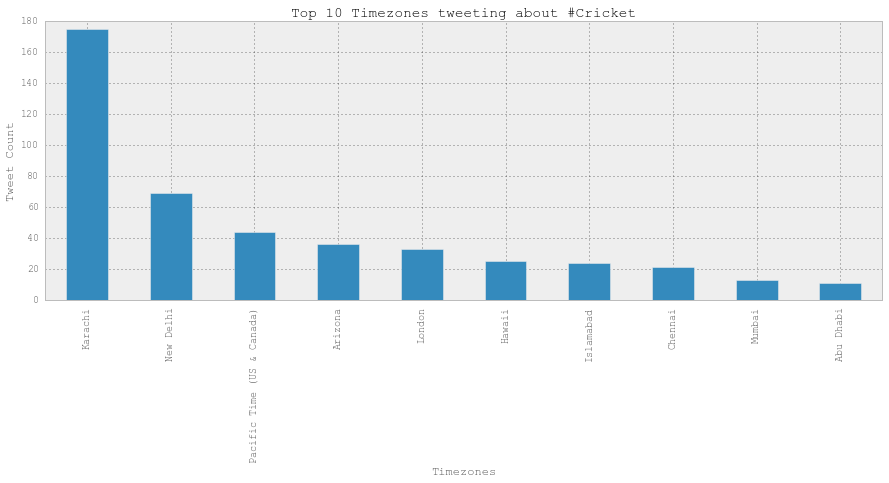

In [63]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
timezone_count.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #Cricket')


In [64]:
DataSet2 = DataSet[DataSet.userLanguage.notnull()]

# Count the number of tweets for each language and get the first 4
language_count = DataSet2['userLanguage'].value_counts()[:4]
language_count

en       890
en-gb     96
en-GB      4
nl         2
Name: userLanguage, dtype: int64

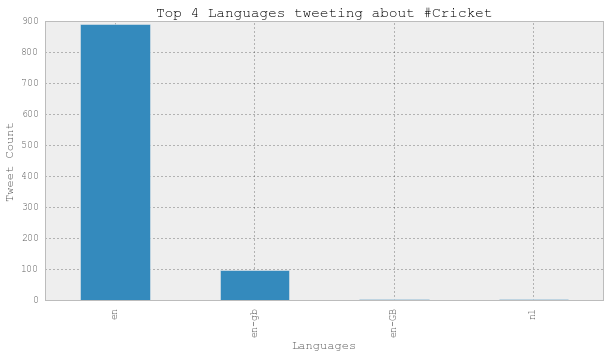

In [65]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (10, 5)

# Plot the language data as a bar-graph
language_count.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Languages')
plt.ylabel('Tweet Count')
plt.title('Top 4 Languages tweeting about #Cricket')


Despite most of the tweets from Karachi(Pakistan) and New Delhi(India), the tweets written in English

In [66]:
DataSet3 = DataSet[DataSet.userName.notnull()]

# Count the number of tweets for each user and get the first 4
name_count = DataSet3['userName'].value_counts()[:4]
name_count

ICC Live Scores        84
Cricket Live Score     68
❎✖©Company_420™®✖❎     57
Wisden India Scores    34
Name: userName, dtype: int64

We can drive from the results that a lot of tweets are about scores 

# Sentiment analysis
positive or negative classification of the tweets 

In [67]:
weights_file = open('weights.txt','r')  #open the weights file 
lines = weights_file.readlines()
mydict= {}
for line in lines:
    #split each line and store the data in the form key:value
    key, value = line.split("\t")
    mydict[key] = int(value)

In [68]:
DataSet = DataSet[DataSet.tweetText.notnull()]
classified = []
for i, text in DataSet.iterrows():
    sentiment =0
    tweet = text['tweetText']  #split tweet ext into words
    words = tweet.split()
    for word in words :
        #loop through each word and add it`s weight if it exists in the dict
        if word in mydict:
            sentiment += mydict[word]
        else :
            sentiment += 0
    #classifie
    if sentiment > 0 :
        classified.append('positive')
    elif sentiment < 0 :
        classified.append('negative')
    else :
        classified.append('neutral')
            
            

In [69]:
DataSet['classification'] = classified #add the classification column to the data set
DataSet.head(5)

,Unnamed: 0,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,userLanguage,userMention,classification
0,0,7.271875e+17,"RT @CricketUrdu: OUT!, Gambhir lbw b Aravind 3...",1,0,Twitter for Android,2016-05-02 17:26:35,717266501485486080,ImPradeepSM7,Pradeep S Maharana,2016-04-05 08:23:54,Student. Photographer. Little Actor $ Dancer. ...,55,253,"Brahmapur, India",NaN,en,None,neutral
1,1,7.271875e+17,"RT @CricketUrdu: KKR 1st Inns 59/2 (8.0), Pan...",1,0,Twitter for Android,2016-05-02 17:26:30,717266501485486080,ImPradeepSM7,Pradeep S Maharana,2016-04-05 08:23:54,Student. Photographer. Little Actor $ Dancer. ...,55,253,"Brahmapur, India",NaN,en,None,neutral
2,2,7.271875e+17,"RT @CricketUrdu: KKR 1st Inns 52/2 (7.0), Pan...",1,0,Twitter for Android,2016-05-02 17:26:29,717266501485486080,ImPradeepSM7,Pradeep S Maharana,2016-04-05 08:23:54,Student. Photographer. Little Actor $ Dancer. ...,55,253,"Brahmapur, India",NaN,en,None,neutral
3,3,7.271873e+17,Shane Warne..1999 World cup semi final..#Crick...,0,0,Twitter for Android,2016-05-02 17:25:42,203029871,mayur13joshi,Mayur Joshi,2010-10-15 11:15:30,An Accidental Engineer,104,33,"Vidyanagar, Gujarat, India",Mumbai,en,None,neutral
4,4,7.271872e+17,#Cricket Live! KKR: 69/4 (10.1 overs) vs RCB: ...,0,0,twitterfeed,2016-05-02 17:25:23,21282163,rediffsports,Rediff Sports,2009-02-19 07:50:53,"Indian sports news and coverage for cricket, f...",1884,33,Mumbai,Hawaii,en,None,negative


In [70]:
# Count the number of tweets for each label
class_count = DataSet['classification'].value_counts()
class_count

neutral     692
positive    244
negative     68
Name: classification, dtype: int64

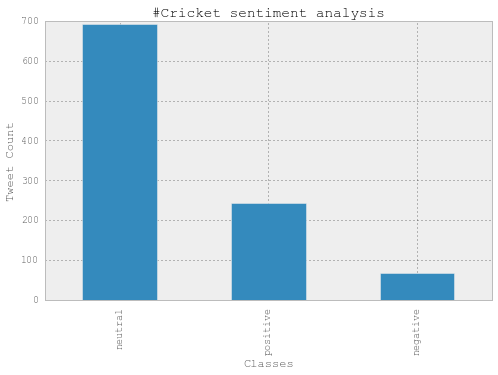

In [71]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (8, 5)

# Plot the class data as a bar-graph
class_count.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Classes')
plt.ylabel('Tweet Count')
plt.title('#Cricket sentiment analysis')


## Data cleaning and data visualization 
for most negative,neutral and positive time zone

In [72]:
time_data = DataSet[DataSet.userTimezone.notnull()]
neutral_data=time_data[time_data['classification']=='neutral']
positive_data = time_data[time_data['classification']=='positive']
negative_data = time_data[time_data['classification']=='negative']

In [73]:
positive_timezone = positive_data['userTimezone'].value_counts()[:3]
positive_timezone

Karachi                       21
London                        18
Pacific Time (US & Canada)    10
Name: userTimezone, dtype: int64

In [74]:
negative_timezone = negative_data['userTimezone'].value_counts()[:3]
negative_timezone

Karachi      10
New Delhi     4
Hawaii        4
Name: userTimezone, dtype: int64

In [75]:
neutral_timezone = neutral_data['userTimezone'].value_counts()[:3]
neutral_timezone

Karachi      144
New Delhi     57
Arizona       35
Name: userTimezone, dtype: int64

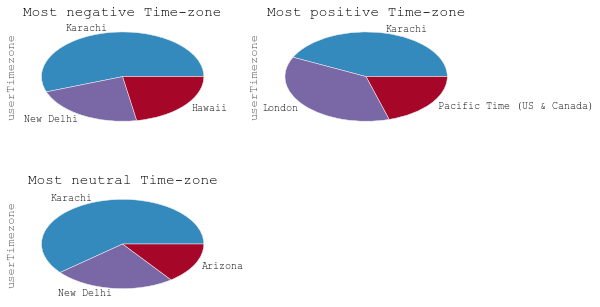

In [76]:
plt.figure(1)
plt.subplot(2,2,1)
plt.title('Most negative Time-zone')
negative_timezone.plot(kind='pie')
plt.subplot(2,2,2)
plt.title('Most positive Time-zone')
positive_timezone.plot(kind='pie')
plt.subplot(2,2,3)
plt.title('Most neutral Time-zone')
neutral_timezone.plot(kind='pie')


